# *Data_cleaning on Zomato dataset*

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Reading the dataset
Dataset link = https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants <br>
Problem statement = Based on the various features related to the restaurant, we have to predict the ratings to be given to the particular restaurant.
So, target feature (dependent) is rate and rest are independent feature

In [2]:
df = pd.read_csv('zomato.csv',  na_values= ['[]'])
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",NaN,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",NaN,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",NaN,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",NaN,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",NaN,Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

### Checking for any duplicate row, if present, removing it

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)

### Dealing the NaN values from dataset

<AxesSubplot:>

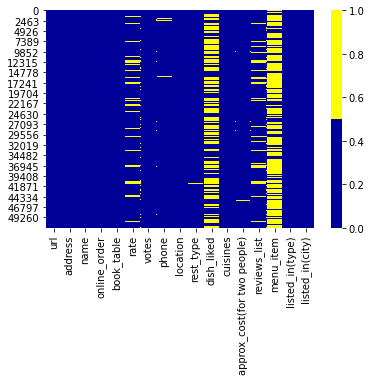

In [6]:
cols = df.columns
colours = ['#000099', '#ffff00'] # specifying the colours --> yellow is missing & blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                    7595
menu_item                      39617
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

##### As from the above information, it would be better to drop unwanted columns first and then deal with the NaN values so as to retain most of the useful data.

#### Removing unwanted columns

In [8]:
# Here, menu_items is also consider because it is having most of the NaN values and so inorder to deal with that we could 
# fill them by searching the respective restaurant on the internet, but as of now it is removed. 

columns_to_drop = ['url', 'address', 'name', 'phone', 'menu_item']
df.drop(columns_to_drop, axis=1, inplace=True)

#### Removing NaN values

In [9]:
df.dropna(how= 'any', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23228 entries, 0 to 51715
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 23228 non-null  object
 1   book_table                   23228 non-null  object
 2   rate                         23228 non-null  object
 3   votes                        23228 non-null  int64 
 4   location                     23228 non-null  object
 5   rest_type                    23228 non-null  object
 6   dish_liked                   23228 non-null  object
 7   cuisines                     23228 non-null  object
 8   approx_cost(for two people)  23228 non-null  object
 9   reviews_list                 23228 non-null  object
 10  listed_in(type)              23228 non-null  object
 11  listed_in(city)              23228 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.3+ MB


In [11]:
df.shape

(23228, 12)

### *Now, the shape of the data contains 23228 rows from 51717 because, the most dominating feature after dropping "menu_items" is the "dish_liked" and which can be deal by doing either survey or collecting the information from the respective restaurant.*

### Changing the names of the columns

In [12]:
df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
df.rename(columns= {'reviews_list':'review', 'listed_in(type)': "rest_listed", 'listed_in(city)': 'city', 'approx_cost(for two people)': 'cost'}, inplace= True)
df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'cost', 'review', 'rest_listed', 'city'],
      dtype='object')

### Some Transformations

In [14]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',', '.'))
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23228 entries, 0 to 51715
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  23228 non-null  object 
 1   book_table    23228 non-null  object 
 2   rate          23228 non-null  object 
 3   votes         23228 non-null  int64  
 4   location      23228 non-null  object 
 5   rest_type     23228 non-null  object 
 6   dish_liked    23228 non-null  object 
 7   cuisines      23228 non-null  object 
 8   cost          23228 non-null  float64
 9   review        23228 non-null  object 
 10  rest_listed   23228 non-null  object 
 11  city          23228 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.3+ MB


In [15]:
df.cost

0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
51705      1.2
51707      2.0
51708      1.2
51711    800.0
51715      2.5
Name: cost, Length: 23228, dtype: float64

### Removing '/5' from the rate column

In [16]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5', '3.4/5',
       '2.7/5', '4.7/5', '3.3/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '2.5 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
df = df.loc[df.rate != 'NEW']
df['rate'] = df['rate'].astype(str)
remove_slash = lambda x: x.replace('/5','') if type(x) == np.str else x
df['rate'] = df['rate'].apply(remove_slash).str.strip()
df['rate'] = df['rate'].astype(float)
df['rate'].head()

<ipython-input-17-0ac9097c723a>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  remove_slash = lambda x: x.replace('/5','') if type(x) == np.str else x


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

### Factorizing the categorical feature
factorize() function encode the object as an enumerated type or categorical variable. This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values.

In [18]:
def encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = encode(df.copy())

In [19]:
df_en.head(10)

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,review,rest_listed,city
0,0,0,4.1,775,0,0,0,0,800.0,0,0,0
1,0,1,4.1,787,0,0,1,1,800.0,1,0,0
2,0,1,3.8,918,0,1,2,2,800.0,2,0,0
3,1,1,3.7,88,0,2,3,3,300.0,3,0,0
4,1,1,3.8,166,1,0,4,4,600.0,4,0,0
5,0,1,3.8,286,1,0,5,5,600.0,5,0,0
7,0,0,4.6,2556,0,3,6,6,600.0,6,1,0
8,0,1,4.0,324,0,4,7,7,700.0,7,1,0
9,0,1,4.2,504,0,4,8,8,550.0,8,1,0
10,0,1,4.1,402,0,4,9,9,500.0,9,1,0
